Option1: 
Conduct a trend analysis of some variable of interest. Graph it and try different functional forms. Look for subgroup variation across time, too. Extra credit if you consider other variables as a means of explaining the trend. Explain all of your results.


In [2]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# import data

data = pd.read_csv("trends-gss.csv")

I want to analyze the trend of the level of happy over time and if variables like the income they generated affected this number, or the marital status affect this number.
The below list is the interested variables I chose to conduct this analysis.

interested variables: 
realrinc: respondent's income on 1972-2006 surveys in constant dollars (base = 1986)
happy:  how would you say things are these days--would you say that you are very happy, pretty happy, or not too happy?
marital: currently- married, widowed, divorced, separated, or have you never been married?
sex: gender of respondent's 
year: year for this respondent


In [4]:
# highlight interested variable
sub=data[['happy','realrinc','year','marital','sex']]

#drop off na value
sub=sub.dropna()

In [5]:
# check the count after removing na values
sub['happy'].value_counts()

2.0    17783
1.0     9394
3.0     3304
Name: happy, dtype: int64

In [6]:
# in precentage 
sub['n_happy'] = sub['happy'].replace([3,1],[1,3])

sub['n_happy'].value_counts(normalize=True)

2.0    0.583413
3.0    0.308192
1.0    0.108395
Name: n_happy, dtype: float64

this means nearly 58% of respondents think they have a pretty happy in general; nearly 11%  is not too happy; and nearly 31% think they are very happy.

3- very happy
2- pretty happy
1- not too happy

In [7]:
sub['n_realrinc'] = sub['realrinc']
sub['n_realrinc'].value_counts(normalize=True)

25582.50     0.006594
21010.00     0.006201
21612.00     0.005905
23563.00     0.005873
31005.00     0.005807
               ...   
3320.90      0.000328
4067.05      0.000295
135131.00    0.000230
68600.00     0.000230
74970.00     0.000197
Name: n_realrinc, Length: 525, dtype: float64

In [8]:
sub['n_marital'] = sub['marital']
sub['n_marital'].value_counts(normalize=True)

1.0    0.548374
5.0    0.236639
3.0    0.141596
2.0    0.037630
4.0    0.035760
Name: n_marital, dtype: float64

It indicated that nearly 55% of respondents are married, 24% of respondents never married, 14% of it are divorced, rest of it are either windowed or separated.  

<Axes: xlabel='year', ylabel='mean_happy'>

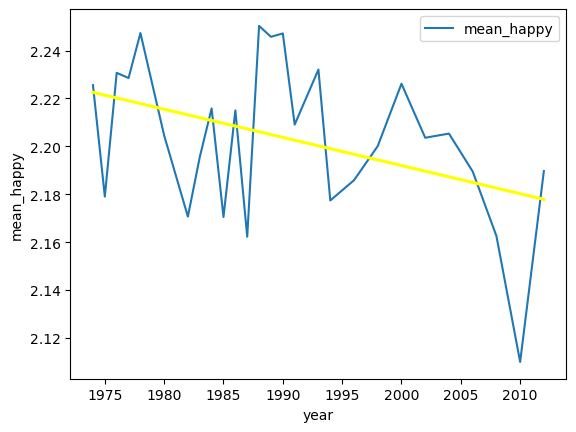

In [9]:
# how ppl evaluated their happiness
by_year = sub.groupby('year', as_index = False).agg({"n_happy": "mean"})\
            .rename(columns = {'n_happy': 'mean_happy'})

# changing trend of how ppl thought of their feeling of happy
by_year.plot(x='year', y= 'mean_happy')
sns.regplot(x = 'year', y = 'mean_happy', data = by_year, scatter = False, ci = None, fit_reg = True, color = 'yellow')

There is a sudden raise between 1985 and 1990, which means people are more likely feel happy. It could likely because the presidential election in 1988 that George H.W Bush was elected president and people are expectation for the new president to take office. Moreover, there is a decline in 2010, it could because of the economic was getting worse and worse at that period after the global financial crisis. 

<Axes: xlabel='year', ylabel='mean_realrinc'>

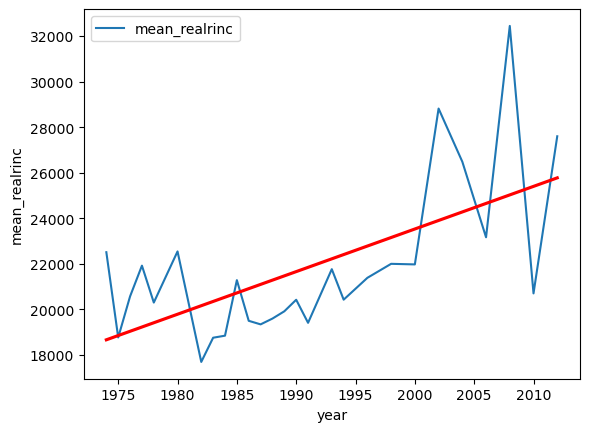

In [10]:
# the mean of income for respondents in each year
by_year = sub.groupby('year', as_index = False).agg({"n_realrinc": "mean"})\
            .rename(columns = {'n_realrinc': 'mean_realrinc'})
# the changing trend of income
by_year.plot(x='year', y= 'mean_realrinc')
sns.regplot(x = 'year', y = 'mean_realrinc', data = by_year, scatter = False, ci = None, fit_reg = True, color = 'red')

The average of respondents' income changed a a lot over the years. Looking at the graph as a whole, the mean of income respondents generated are increasing over the year change. 

<Axes: xlabel='year', ylabel='mean_marital'>

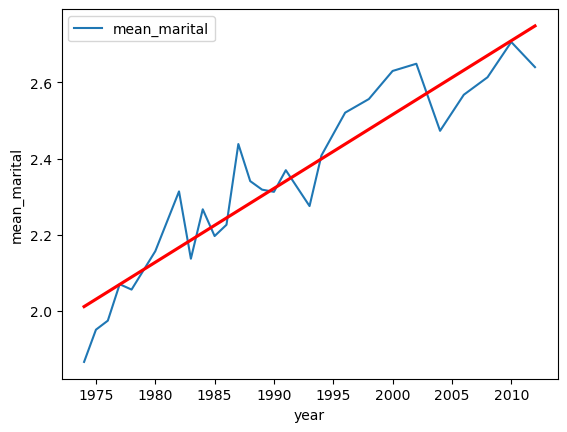

In [11]:
# ppl marital status
by_year = sub.groupby('year', as_index = False).agg({"n_marital": "mean"})\
            .rename(columns = {'n_marital': 'mean_marital'})
# the changing trend of marital status
by_year.plot(x='year', y= 'mean_marital')
sns.regplot(x = 'year', y = 'mean_marital', data = by_year, scatter = False, ci = None, fit_reg = True, color = 'red')

with the year change, there is a raising trend of people tend to not be in a marriage relationship. 

In [26]:
# build a regression model to show how people's income affect their happy level. 
import statsmodels.api as sm
import statsmodels.formula.api as smf

lm_happy=smf.ols('n_happy~realrinc', data=sub).fit()
lm_happy.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                n_happy   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     235.1
Date:                Sat, 14 Oct 2023   Prob (F-statistic):           7.18e-53
Time:                        23:36:31   Log-Likelihood:                -28253.
No. Observations:               30481   AIC:                         5.651e+04
Df Residuals:                   30479   BIC:                         5.653e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1583      0.004    487.478      0.000       2.150       2.167
realrinc    1.903e-06   1.24e-07     15.334      0.000    1.66e-06    2.15e-06
==============================================================================
Omnibus:                      751.517   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              444.477
Skew:                          -0.141   Prob(JB):                     3.04e-97
Kurtosis:                       2.480   Cond. No.                     4.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

this linear regression model conducts the idea of how the income generate affect the person's happiness. It indicated that the increase rate of being happy, the person is making more by 1.903e-06 in dollar. This model has R-squared of 0.008, which is not great, it means only 0.8% of the variance in the dependent variable happy is explained by the independent variables realrinc. Therefore, this model may not be a good fit for the data and there could have other factor affect the variable happy that are not consider in this model. 

In [27]:
# testing heteroskedasticity for model 1
from statsmodels.compat import lzip

name =['BP', 'p_value', 'f-value', 'f p-value']
test =sm.stats.diagnostic.het_breuschpagan(lm_happy.resid, lm_happy.model.exog)
lzip(name, test)

[('BP', 4.248497499115591),
 ('p_value', 0.03928507257034198),
 ('f-value', 4.248810942497021),
 ('f p-value', 0.03928628405571609)]

with the p-value is lower than 0.05, there is heteroskedasticity in the OLS model for happy-realric variable . 

In [28]:
# apply robust standard errors
lm_rob = smf.ols('n_happy~realrinc', data=sub).fit(cov_type='HC1')
lm_rob.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                n_happy   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     189.3
Date:                Sat, 14 Oct 2023   Prob (F-statistic):           6.12e-43
Time:                        23:36:39   Log-Likelihood:                -28253.
No. Observations:               30481   AIC:                         5.651e+04
Df Residuals:                   30479   BIC:                         5.653e+04
Df Model:                           1                                         
Covariance Type:                  HC1                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1583      0.005    463.834      0.000       2.149       2.167
realrinc    1.903e-06   1.38e-07     13.758      0.000    1.63e-06    2.17e-06
==============================================================================
Omnibus:                      751.517   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              444.477
Skew:                          -0.141   Prob(JB):                     3.04e-97
Kurtosis:                       2.480   Cond. No.                     4.51e+04
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
[2] The condition number is large, 4.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
# dummary variables for realrinc

lm_dummy = smf.ols('n_happy~C(realrinc)', data=sub).fit()
lm_dummy.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                n_happy   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     1.791
Date:                Sat, 14 Oct 2023   Prob (F-statistic):           2.64e-25
Time:                        23:36:49   Log-Likelihood:                -27900.
No. Observations:               30481   AIC:                         5.685e+04
Df Residuals:                   29956   BIC:                         6.122e+04
Df Model:                         524                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        1.9630      0.117     16.732      0.000       1.733       2.193
C(realrinc)[T.259.0]             0.0715      0.163      0.439      0.661      -0.248       0.391
C(realrinc)[T.267.75]            0.0847      0.177      0.477      0.633      -0.263       0.432
C(realrinc)[T.284.25]            0.0942      0.156      0.603      0.546      -0.212       0.400
C(realrinc)[T.301.9]             0.2476      0.183      1.356      0.175      -0.110       0.605
C(realrinc)[T.312.85]            0.0926      0.185      0.499      0.618      -0.271       0.456
C(realrinc)[T.333.0]             0.0870      0.152      0.573      0.566      -0.211       0.385
C(realrinc)[T.345.0]             0.0614      0.151      0.407      0.684      -0.235       0.358
C(realrinc)[T.363.0]             0.3585      0.164      2.180      0.029       0.036       0.681
C(realrinc)[T.382.0]             0.1279      0.143      0.893      0.372      -0.153       0.409
C(realrinc)[T.393.0]             0.1140      0.168      0.680      0.496      -0.214       0.442
C(realrinc)[T.418.0]             0.1253      0.157      0.797      0.425      -0.183       0.433
C(realrinc)[T.444.0]             0.4370      0.169      2.583      0.010       0.105       0.769
C(realrinc)[T.464.0]             0.1513      0.156      0.969      0.333      -0.155       0.457
C(realrinc)[T.483.0]             0.2135      0.157      1.359      0.174      -0.095       0.522
C(realrinc)[T.500.0]             0.0959      0.145      0.661      0.509      -0.189       0.380
C(realrinc)[T.510.0]             0.2078      0.151      1.375      0.169      -0.088       0.504
C(realrinc)[T.528.0]             0.2322      0.151      1.537      0.124      -0.064       0.528
C(realrinc)[T.550.0]             0.1734      0.149      1.164      0.245      -0.119       0.466
C(realrinc)[T.568.0]             0.1829      0.147      1.247      0.212      -0.105       0.470
C(realrinc)[T.603.0]             0.1370      0.141      0.970      0.332      -0.140       0.414
C(realrinc)[T.755.0]             0.4148      0.148      2.795      0.005       0.124       0.706
C(realrinc)[T.905.0]             0.3228      0.138      2.337      0.019       0.052       0.593
C(realrinc)[T.963.0]             0.2037      0.141      1.442      0.149      -0.073       0.481
C(realrinc)[T.980.0]             0.2245      0.159      1.409      0.159      -0.088       0.537
C(realrinc)[T.1019.0]            0.4120      0.143      2.885      0.004       0.132       0.692
C(realrinc)[T.1036.0]            0.1068      0.150      0.714      0.476      -0.187       0.400
C(realrinc)[T.1071.0]            0.0627      0.153      0.411      0.681      -0.236       0.362
C(realrinc)[T.1112.0]            0.1469      0.134      1.100      0.271    

using dummy variables for realrinc improved the model significantly that the R-squared is 3% that shown the model based on the salary, the opinions of level of happiness would be more accurated. For example, for person who generate around 480k, it indicated that the increase rate of being happy. 

In [44]:

hypothesis = '(C(realrinc)[T.30841.0] = C(realrinc)[T.87058.0])'

f_test =lm_dummy.f_test(hypothesis)
f_test

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=7.525720113803169, p=0.0060860399818284654, df_denom=3e+04, df_num=1>

a p value less than 0.05 indicated there is a significant difference in the consider of the level of happniess for person who are making between these two range. 

In [16]:
# build a regression model to show how people's marriage status affect their happy level. 
import statsmodels.api as sm
import statsmodels.formula.api as smf

lm_happy2=smf.ols('n_happy~marital', data=sub).fit()
lm_happy2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                n_happy   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     1166.
Date:                Sat, 14 Oct 2023   Prob (F-statistic):          9.88e-251
Time:                        23:27:53   Log-Likelihood:                -27798.
No. Observations:               30481   AIC:                         5.560e+04
Df Residuals:                   30479   BIC:                         5.562e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.3663      0.006    396.119      0.000       2.355       2.378
marital       -0.0701      0.002    -34.141      0.000      -0.074      -0.066
==============================================================================
Omnibus:                      616.880   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              403.876
Skew:                          -0.155   Prob(JB):                     1.99e-88
Kurtosis:                       2.529   Cond. No.                         5.45
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

this linear regression model conducts the idea of how the marital status affect the person's happiness. It indicated that the increase rate of being happy, the tendency of person being not married decrease by 0.07 which indicating people who have high level of happiness will more likely want to get married as the time passes. This model has R-squared of 0.037, which means 3.7% of the variance in the dependent variable happy is explained by the independent variables marital.

In [17]:
# testing heteroskedasticity for model 2
name =['BP', 'p_value', 'f-value', 'f p-value']
test =sm.stats.diagnostic.het_breuschpagan(lm_happy2.resid, lm_happy2.model.exog)
lzip(name, test)

[('BP', 0.46255145123196084),
 ('p_value', 0.4964339570171997),
 ('f-value', 0.46252811997984294),
 ('f p-value', 0.4964499826439035)]

with the p-value is greater than 0.05, there is no heteroskedasticity in the OLS model for happy-marital variable . 

In [18]:
# addin another variation with sex

# how ppl evaluated their happiness with gender
by_sex = sub.groupby('sex', as_index = False).agg({"n_happy": "mean"})\
            .rename(columns = {'n_happy': 'mean_happy'})
by_sex

,sex,mean_happy
0,1,2.19657
1,2,2.20314


the average of level of happiness between female and male are likely same, around 2.20, that they both feel pretty happy. 